In [30]:
from sympy import *

In [4]:
# To evaluate function f at point denoted by values
def evalFunc(f,variables,values):
    i = 0
    for x in variables :
        f = f.subs(x,values[i])
        i += 1
    return f.evalf()

In [5]:
# To find partial differentiation of function f wrt to variable 'wrt_this'
def findDiff(f,wrt_this):
    return f.diff(wrt_this)

In [37]:
# To solve function f, constrained to the given inequalities, for the point of minima
def minimize(f,inequalities):
    
    l1,l2 = symbols('l1 l2')
    
    # Define Lagrange of the problem
    L = f + l1 * inequalities[0] + l2 * inequalities[1]     
    
    # Gradient of Lagrange
    Lx = findDiff(L,x)
    Ly = findDiff(L,y)
    Ll1 = findDiff(L,l1)
    Ll2 = findDiff(L,l2)
    
    # Solve for Gradient(L) = 0
    # nonlinsolve returns a list of solutions of the given non linear set of equations
    ans = list(nonlinsolve([Lx,Ly,Ll1,Ll2],[x,y,l1,l2]))
    
    # Check if any of the solution in ans List is feasible by verifying values of l1(sol[2]) and l2(sol[3])
    feasible = true
    prevMin = 100000
    finalSol = []
    for sol in ans:
        #Get the feasible solution that gives minimum value of f
        if(sol[2] >= 0 and sol[3] >= 0 and evalFunc(f,[x,y],[sol[0],sol[1]]) < prevMin):
            finalSol = sol
            prevMin = evalFunc(f,[x,y],[sol[0],sol[1]])
                
    if(finalSol == []): feasible = false 
    if(feasible == true):
        print("Both the constraints were active")
        return finalSol
    
    # If none of solutions in ans List is feasible, then some of the constraints maybe inactive
    if(feasible == false):
        
        # CASE-1 : Assuming only g1 active
        
        # Define new Lagrange of the problem
        L = f + l1 * inequalities[0]
        
        # Find Gradient of new Lagrange
        Lx = findDiff(L,x)
        Ly = findDiff(L,y)
        Ll1 = findDiff(L,l1)
        
        # Solve for Gradient(L) = 0
        ans = list(nonlinsolve([Lx,Ly,Ll1],[x,y,l1]))
        
        # Check if any of the solutions in ans List satisfies the active constraint
        prevMin = 10000
        finalSol = []
        for sol in ans:
            val = inequalities[0].subs(x,sol[0]).subs(y,sol[1]).subs(l1,sol[2])
            #If a solution satisfies the active constraint then this might be the required solution
            #Get the solution that gives minimum value of f
            if(val <= 0 and evalFunc(f,[x,y],[sol[0],sol[1]]) < prevMin):
                finalSol = sol
                prevMin = evalFunc(f,[x,y],[sol[0],sol[1]])
        
        if(finalSol != []):
            print("Only g1 was active")
            return finalSol
        
        # If none of the solutions satify the active constraint then our assumption that only g1 is active was false
        
        # CASE-2 : Assuming only g2 active
        
        # Define new Lagrange of the problem
        L = f + l2 * inequalities[1]
        
        # Find Gradient of new Lagrange
        Lx = findDiff(L,x)
        Ly = findDiff(L,y)
        Ll2 = findDiff(L,l2)
        
        # Solve for Gradient(L) = 0
        ans = list(nonlinsolve([Lx,Ly,Ll2],[x,y,l2]))
        
        # Check if any of the solutions in ans List satisfies the active constraint
        prevMin = 10000
        finalSol = []
        for sol in ans:
            val = inequalities[0].subs(x,sol[0]).subs(y,sol[1]).subs(l2,sol[2])
            #If a solution satisfies the active constraint then this might be the required solution
            #Get the solution that gives minimum value of f
            if(val <= 0 and evalFunc(f,[x,y],[sol[0],sol[1]]) < prevMin):
                finalSol = sol
                prevMin = evalFunc(f,[x,y],[sol[0],sol[1]])
        
        if(finalSol != []):
            print("Only g2 was active")
            return finalSol
        
        # If none of the solutions satify the active constraint then our assumption that only g2 is active was false
        
        # CASE-3 : Assuming both constraints inactive
        
        # Define new Lagrange of the problem
        L = f
        
        # Find Gradient of new Lagrange
        Lx = findDiff(L,x)
        Ly = findDiff(L,y)
        
        # Solve for Gradient(L) = 0
        ans = list(nonlinsolve([Lx,Ly],[x,y]))
        
        # Check if any of the solutions in ans List satisfies both of the inactive constraints
        prevMin = 10000
        finalSol = []
        for sol in ans:
            val1 = inequalities[0].subs(x,sol[0]).subs(y,sol[1])
            val2 = inequalities[1].subs(x,sol[0]).subs(y,sol[1])
            if(val < 0 and val2 < 0 and evalFunc(f,[x,y],[sol[0],sol[1]]) < prevMin):
                finalSol = sol
                prevMin = evalFunc(f,[x,y],[sol[0],sol[1]])
        
        if(finalSol != []):
            print("None of the constraints were active")
            return finalSol
        else : print("No Solution")
    

Both the constraints were active
x = -1.18817705157201, y = -2.37635410314402
f(x,y) = -13.4194114059898


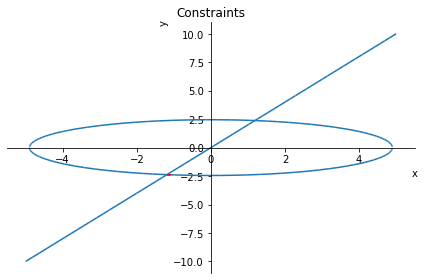

In [38]:
# Declaring x and y as sympy symbols
x,y = symbols('x y')

#Declaring function f
f = y**3

#Inequality Conditions:
g1 = x**2 + 4*y**2 - 24
g2 = x - 0.5*y

#Variables and Inequality lists
variables = [x,y]
inequalities = [g1,g2]

ans = minimize(f,inequalities)

#print optimal point and optimal value
print("x = " + str(ans[0]) +", y = " + str(ans[1]))
values = [ans[0],ans[1]]
print("f(x,y) = " + str(evalFunc(f,variables,values)))

#plot g1
p1 = plot(-sqrt(24 - x**2)/2,sqrt(24 - x**2)/2, show = false)

#plot g2 and extend it to show g1 as well
p2 = plot(x/0.5, (x,-5,5), show = false, title = 'Constraints', ylabel = 'y')
p2.extend(p1)

#extend previous plot to show optimal point
p3 = plot(ans[1],(x,ans[0],ans[0] + 0.1),show = false,line_color = 'red')
p2.extend(p3)
p2.show()